# **1.Data Scrapping using Requests**

1.1 Initial Information Extraction

In [50]:
# using Requests to get HTML
import requests
import pandas as pd

In [51]:
# get the TRUSTPILOT urls for Mcdonalds reviews
urls = [
    "https://www.trustpilot.com/review/www.mcdonalds.co.uk",
    "https://www.trustpilot.com/review/www.mcdonalds.com",
    "https://www.trustpilot.com/review/people.mcdonalds.co.uk"]

In [52]:
# get html status and source codes
for url in urls:
    html = requests.get(url)
    print(f"Fetched {url}: {html.status_code}")
    #print(f"HTML text:{html.text}")

Fetched https://www.trustpilot.com/review/www.mcdonalds.co.uk: 200
Fetched https://www.trustpilot.com/review/www.mcdonalds.com: 200
Fetched https://www.trustpilot.com/review/people.mcdonalds.co.uk: 200


In [53]:
# Prase the html_1 file for extracting information using BeatifulSoup
from bs4 import BeautifulSoup
url_1 = "https://www.trustpilot.com/review/www.mcdonalds.co.uk"
html_1 = requests.get(url_1)
soup = BeautifulSoup(html_1.text)

In [54]:
# Extract the right information from html with CSS selector
name_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > div > aside > div > a > span"
regions_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > div > aside > div > a > div > span:nth-child(1)"
rating_elements = soup.select('div[data-service-review-rating]')
dates_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > p > span"
title_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > a"
content_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > p.typography_body-l__v5JLj.typography_appearance-default__t8iAq"
css_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > a"

In [55]:
# find all information
names = [x.text for x in soup.select(name_path)]
regions = [x.text for x in soup.select(regions_path)]
ratings = [el["data-service-review-rating"] for el in rating_elements]
dates = [x.text for x in soup.select(dates_path)]
titles = [x.text for x in soup.select(title_path)]
contents = [x.text for x in soup.select(content_path)]
## Comnplete the url
#pre_url = "https://www.trustpilot.com"
#href = [pre_url+x['href'] for x in soup.select(css_path)]

In [56]:
# check columns lenths
print("names:", len(names))
print("regions:", len(regions))
print("ratings:", len(ratings))
print("dates:", len(dates))
print("titles:", len(titles))
print("contents:", len(contents))

names: 20
regions: 20
ratings: 20
dates: 20
titles: 20
contents: 18


In [57]:
# fill the length gap
contents += ["NA"] * (len(titles) - len(contents))

In [58]:
comments_df = pd.DataFrame({
    'name':names,
    'region':regions,
    'rating':ratings,
    'date':dates,
    'title':titles,
    'content':contents,
    #'href':href
})
comments_df

name region rating               date  \
0            TracyB     GB      1     March 31, 2025   
1             Carla     GB      1     March 31, 2025   
2          Customer     GB      1     March 31, 2025   
3       clare quinn     IE      1     March 31, 2025   
4              Luke     GB      1     March 31, 2025   
5        Glen Haigh     GB      1     March 31, 2025   
6   Harriet Bristow     GB      1     March 31, 2025   
7              Nick     GB      1     March 30, 2025   
8      Mark Summers     GB      1     March 30, 2025   
9               Eko     GB      3     March 22, 2025   
10         Abin k.s     IN      5     March 29, 2025   
11  Mohammed Javeed     IN      5     March 27, 2025   
12     Faizal Shaik     IN      5  November 12, 2024   
13       Luke Ryder     GB      1     March 30, 2025   
14           Simon      GB      1     March 29, 2025   
15     Mo Mehmetali     GB      1     March 29, 2025   
16              Lee     GB      1     March 29, 2025   
17     Marek Markus     GB      1     March 27, 2025   
18            jon c     GB      1     March 29, 2025   
19     Nicola Firth     GB      1     March 28, 2025   

                                                title  \
0                              Robbed by McDonald's.    
1              We ordered our food and it's taken 30…   
2                             Missing item from order   
3                                   Cold yet again!!!   
4                             Stop going to Mcdonalds   
5                                         Never Again   
6                                            Thief’s    
7                        Bunch of clowns and thieves    
8                                  Appalling company    
9    Go here if you want to have a once a month meal.   
10                   It was good.enjoyed it very well   
11                                       Good service   
12                                    Good experience   
13                              Mcdonals Vile Burgurs   
14               There so bad here they use Uber and…   
15  Just ordered from the app worst thing I’ve eve...   
16                               Ordered for delivery   
17              Worst customer service in the UK !!!!   
18                Our local McDonalds at Wessex gate…   
19                                       Never again    

                                              content  
0   I feel robbed and I'd have given zero stars fo...  
1   We ordered our food and it's taken 30 mins for...  
2   When your order is missing an item there is no...  
3   McDonald's Review - Rawcliffe Road, Airmyn, Go...  
4   How are you justifying these prices?The minecr...  
5   Visited Stairfoot branch this time, only given...  
6   Ordered through the McDonalds app to be delive...  
7   It’s funny they have Ronald McDonald and the h...  
8   Appalling company Do not order from here with ...  
9                 Tasty food although very unhealthy   
10                                      Good service   
11  While MaDonalds food standards have been in de...  
12  There so bad here they use Uber and always the...  
13  Just ordered from the app, time changed twice ...  
14  Ordered for delivery, completely the wrong ord...  
15  Problem reference number: 4960727McDonalds cus...  
16  Our local McDonalds at Wessex gate retail are ...  
17  Went to Darlington McDonald's yesterday ordere...  
18                                                 NA  
19                                                 NA

1.2 DataFrame Defining & Further Information

using only https://www.trustpilot.com/review/www.mcdonalds.co.uk

In [59]:
# define df for further scraping, remember to check the match url
def fetch_comments(url, star):
  html = requests.get(url)
  soup = BeautifulSoup(html.text)

  names = [x.text for x in soup.select(name_path)]
  regions = [x.text for x in soup.select(regions_path)]
  dates = [x.text for x in soup.select(dates_path)]
  titles = [x.text for x in soup.select(title_path)]
  contents = [x.text for x in soup.select(content_path)]
  star_group = [int(star)] * len(names)

  # length alignment
  min_len = min(len(names), len(regions), len(dates), len(titles), len(contents))

  names = names[:min_len]
  regions = regions[:min_len]
  dates = dates[:min_len]
  titles = titles[:min_len]
  contents = contents[:min_len]
  star_group = [int(star)] * min_len

  comments_df = pd.DataFrame({
    'name': names,
    'region': regions,
    'date': dates,
    'title': titles,
    'content': contents,
    'star_group': star_group
  })

  return comments_df

In [60]:
star_1_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=1"%x for x in range(1, 78)]
star_2_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=2"%x for x in range(1, 7)]
star_3_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=3"%x for x in range(1, 4)]
star_4_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=4"%x for x in range(1, 2)]
star_5_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=5"%x for x in range(1, 10)]

In [61]:
comments_all = pd.concat(
    [fetch_comments(url, '1') for url in star_1_urls] +
    [fetch_comments(url, '2') for url in star_2_urls] +
    [fetch_comments(url, '3') for url in star_3_urls] +
    [fetch_comments(url, '4') for url in star_4_urls] +
    [fetch_comments(url, '5') for url in star_5_urls]
)
comments_all['star_group'].value_counts()

star_group
1    1517
5     167
2     117
3      55
4      18
Name: count, dtype: int64

In [62]:
df_UK = comments_all[comments_all['region'].isin(['GB'])]
print(df_UK[df_UK['region'] == 'GB'].count())
df_UK.to_csv("mcdonalds_pages_uk.csv")

name          1771
region        1771
date          1771
title         1771
content       1771
star_group    1771
dtype: int64


In [63]:
df_UK

name region            date  \
0             TracyB     GB  March 31, 2025   
1              Carla     GB  March 31, 2025   
2           Customer     GB  March 31, 2025   
4               Luke     GB  March 31, 2025   
5         Glen Haigh     GB  March 31, 2025   
..               ...    ...             ...   
15  Adrian Gomersall     GB  April 25, 2024   
16       Shelly Gore     GB  April 23, 2024   
17    Stanley Dawson     GB  April 22, 2024   
18          Bianca S     GB  April 13, 2024   
19       Laura Clark     GB  April 17, 2024   

                                      title  \
0                    Robbed by McDonald's.    
1    We ordered our food and it's taken 30…   
2                   Missing item from order   
4                   Stop going to Mcdonalds   
5                               Never Again   
..                                      ...   
15   I have been to hechmondwike store and…   
16            Exceptional customer service    
17                        i love maccy D's.   
18                    BRENT PARK RESTAURANT   
19  Lovely Mcdonalds great meal for me and…   

                                              content  star_group  
0   I feel robbed and I'd have given zero stars fo...           1  
1   We ordered our food and it's taken 30 mins for...           1  
2   When your order is missing an item there is no...           1  
4   How are you justifying these prices?The minecr...           1  
5   Visited Stairfoot branch this time, only given...           1  
..                                                ...         ...  
15  I have been to hechmondwike store and the serv...           5  
16  After several trips before i have had my first...           5  
17  i love maccy D's.Yesterday we were at a concer...           5  
18  The staff are friendly and give great customer...           5  
19     Lovely Mcdonalds great meal for me and family            5  

[1771 rows x 6 columns]

# **2. Data Preprocessing**

In [64]:
import pandas as pd
import numpy as np

import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# Get the dataframe
DATASET_COLUMNS = ['id', 'name', 'region', 'date', 'title', 'content', 'star_group']
df_UK = pd.read_csv("mcdonalds_pages_uk.csv", encoding="ISO-8859-1",names=DATASET_COLUMNS)
df_UK.head(20)

# Drop the original titles
df_UK = df_UK.drop(df_UK.index[0]).drop(columns=['id', 'name', 'region'], axis=1)
df_UK.head()

# text = title + content
df_UK['text'] = df_UK['title'].fillna('') + " " + df_UK['content'].fillna('')
df_UK.drop(columns=['title', 'content'], inplace=True)
df_UK.head()

date star_group  \
1  March 31, 2025          1   
2  March 31, 2025          1   
3  March 31, 2025          1   
4  March 31, 2025          1   
5  March 31, 2025          1   

                                                text  
1  Robbed by McDonald's.  I feel robbed and I'd h...  
2  We ordered our food and it's taken 30â¦ We or...  
3  Missing item from order When your order is mis...  
4  Stop going to Mcdonalds How are you justifying...  
5  Never Again Visited Stairfoot branch this time...

In [66]:
df_UK['star_group'].value_counts()

star_group
1    1456
5     145
2     111
3      45
4      14
Name: count, dtype: int64

In [67]:
# check the time period
df_UK['date'] = pd.to_datetime(df_UK['date'])
print(f"time period: {df_UK['date'].min().date()} to {df_UK['date'].max().date()}")
# fix the time
df_UK = df_UK[(df_UK['date'] >= '2024-03-01')&(df_UK['date'] <= '2025-03-30')]
#df_UK = df_UK[(df_UK['date'] >= '2024-03-01')]
print(f"Last 12 months time period: {df_UK['date'].min().date()} to {df_UK['date'].max().date()}")
df_UK.count()

time period: 2023-05-11 to 2025-03-31
Last 12 months time period: 2024-03-06 to 2025-03-30


date          1729
star_group    1729
text          1729
dtype: int64

For sentiment analysis


In [68]:
# define sentiment dictionary
sentiment_dict = {
    1: "Negative",
    2: "Neutral-Negative",
    3: "Neutral-Negative",
    4: "Positive",
    5: "Positive"
}

# define sentiment mapping
def star_to_sentiment(star):
  return sentiment_dict.get(int(float(star)))

# Apply the star to sentiment
df_UK["sentiment"] = df_UK['star_group'].apply(star_to_sentiment)
df_UK.head()

date star_group                                               text  \
7  2025-03-30          1  Bunch of clowns and thieves  Itâs funny they...   
8  2025-03-30          1  Appalling company  Appalling company Do not or...   
9  2025-03-22          1  Go here if you want to have a once a month mea...   
10 2025-03-30          1  Mcdonals Vile Burgurs Just ordered from the ap...   
11 2025-03-29          1  There so bad here they use Uber andâ¦ Ordered...   

   sentiment  
7   Negative  
8   Negative  
9   Negative  
10  Negative  
11  Negative

Cleaning

In [69]:
!pip install unidecode

In [70]:
# Remove diacritics words
from unidecode import unidecode
df_UK['text'] = df_UK['text'].apply(lambda x: unidecode(str(x)))

# Remove URLs
def remove_URLs(data):
    return re.sub(r'((http://)[^\s]*|(https://)[^\s]*|(www\.)[^\s]*)', ' ', data)
df_UK['text'] = df_UK['text'].apply(lambda x: remove_URLs(x))

# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[^\w\s]", " ", data)

df_UK['text']= df_UK['text'].apply(lambda x: remove_punctuations(x))

# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df_UK['text'] = df_UK['text'].apply(lambda x: remove_numbers(x))

# lowcase
df_UK['text'] = df_UK['text'].str.lower()
df_UK.head(30)

date star_group                                               text  \
7  2025-03-30          1  bunch of clowns and thieves  itas funny they h...   
8  2025-03-30          1  appalling company  appalling company do not or...   
9  2025-03-22          1  go here if you want to have a once a month mea...   
10 2025-03-30          1  mcdonals vile burgurs just ordered from the ap...   
11 2025-03-29          1  there so bad here they use uber anda  ordered ...   
12 2025-03-29          1  just ordered from the app worst thing iave eve...   
13 2025-03-29          1  ordered for delivery our local mcdonalds at we...   
14 2025-03-27          1  worst customer service in the uk      went to ...   
15 2025-02-25          1       full of liars had to wait  minutes for fries   
16 2025-03-27          1  time wasters new inn pontypool ordering via ap...   
17 2025-03-27          1  macdonalds trying to trick the public         ...   
18 2025-03-19          1  i really can t believe why people sita  i real...   
19 2025-03-26          1  leatherhead mcdonalds awful leatherhead mcdona...   
20 2025-03-26          1  hot drinks served lukewarm it appears the stan...   
21 2025-03-25          1  ordered muffin no cheese no egg  i got a  orde...   
22 2025-03-23          1  terrible mcdonalds bradley stokea  the new adv...   
23 2025-01-18          1  mcdonaldas  butt ln mcdonaldas  butt ln  farnl...   
24 2025-03-23          1  charges extra without consumersa  charges extr...   
25 2025-03-24          1  uk menu is booooooooooooooooooring    uk menu ...   
26 2025-02-26          1  no no no no no no no no no no   delivery bad p...   
27 2025-03-23          1  do not place on line orders as incorrect  on l...   
28 2025-03-23          1  called in to mcdonald s o avoidutside thea  ca...   
29 2025-03-23          1  just put it out of business people just put it...   
30 2025-03-22          1  poor poor poor poor poor poor   ordered food s...   
31 2025-03-21          1  the food is like rubber very disappointed at t...   
32 2025-03-21          1  shocking service if i could leave no stars  i ...   
33 2025-03-21          1  waiting too long for the meal waiting too long...   
34 2025-03-20          1  my experience with them through theira  my exp...   
35 2025-03-20          1   bristol road birmingham mcdonald s  house of ...   
36 2025-03-19          1  extremely slow service extremely slow service ...   

   sentiment  
7   Negative  
8   Negative  
9   Negative  
10  Negative  
11  Negative  
12  Negative  
13  Negative  
14  Negative  
15  Negative  
16  Negative  
17  Negative  
18  Negative  
19  Negative  
20  Negative  
21  Negative  
22  Negative  
23  Negative  
24  Negative  
25  Negative  
26  Negative  
27  Negative  
28  Negative  
29  Negative  
30  Negative  
31  Negative  
32  Negative  
33  Negative  
34  Negative  
35  Negative  
36  Negative

In [111]:
# Removing the stop words list from text
stop_words = stopwords.words('english')
new_stopwords = ["mcdonald's","mcdonald","mcdonalda","mcdonaldas","mcdonalds","order","food","ordered"]
stop_words.extend(new_stopwords)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df_UK['text'] = df_UK['text'].apply(lambda text: cleaning_stopwords(text))
df_UK.head(30)

date star_group                                               text  \
7  2025-03-30          1  bunch clown thief itas funny ronald hamburglar...   
8  2025-03-30          1  appalling company appalling company delivery a...   
9  2025-03-22          1        go want month meal tasty although unhealthy   
10 2025-03-30          1  mcdonals vile burgurs app time changed twice c...   
11 2025-03-29          1  bad use uber anda delivery completely wrong ar...   
12 2025-03-29          1  app worst thing iave ever done problem referen...   
13 2025-03-29          1  delivery local wessex gate retail terrible usi...   
14 2025-03-27          1  worst customer service uk went darlington yest...   
15 2025-02-25          1                          full liar wait minute fry   
16 2025-03-27          1  time waster new inn pontypool ordering via app...   
17 2025-03-27          1  macdonalds trying trick public bought fillet f...   
18 2025-03-19          1  really believe people sita really believe peop...   
19 2025-03-26          1  leatherhead awful leatherhead shocking shortag...   
20 2025-03-26          1  hot drink served lukewarm appears stanier reta...   
21 2025-03-25          1  muffin cheese egg got muffin cheese egg got ch...   
22 2025-03-23          1  terrible bradley stokea new advert state burge...   
23 2025-01-18          1  butt ln butt ln farnley leeds l je poor custom...   
24 2025-03-23          1  charge extra without consumersa charge extra w...   
25 2025-03-24          1  uk menu booooooooooooooooooring uk menu booooo...   
26 2025-02-26          1  delivery bad pad rotten posonus bad kill sad b...   
27 2025-03-23          1  place line incorrect line double quarter pound...   
28 2025-03-23          1  called avoidutside thea called outside south t...   
29 2025-03-23          1  put business people put business people aps ea...   
30 2025-03-22          1  poor poor poor poor poor poor say delivered ph...   
31 2025-03-21          1  like rubber disappointed drive friern barnet r...   
32 2025-03-21          1  shocking service could leave star would helen ...   
33 2025-03-21          1  waiting long meal waiting long meal bad wait m...   
34 2025-03-20          1  experience theira experience mcdelivery appa a...   
35 2025-03-20          1  bristol road birmingham house racist extremely...   
36 2025-03-19          1  extremely slow service extremely slow service ...   

   sentiment  
7   Negative  
8   Negative  
9   Negative  
10  Negative  
11  Negative  
12  Negative  
13  Negative  
14  Negative  
15  Negative  
16  Negative  
17  Negative  
18  Negative  
19  Negative  
20  Negative  
21  Negative  
22  Negative  
23  Negative  
24  Negative  
25  Negative  
26  Negative  
27  Negative  
28  Negative  
29  Negative  
30  Negative  
31  Negative  
32  Negative  
33  Negative  
34  Negative  
35  Negative  
36  Negative

In [112]:
# import and download the resource lemmatize needs
import nltk
nltk.download('wordnet')

# lemmatize
lm = WordNetLemmatizer()

def lemmatizer_on_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lm.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_UK['text'] = df_UK['text'].apply(lemmatizer_on_text)
df_UK.head(30)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


date star_group                                               text  \
7  2025-03-30          1  bunch clown thief itas funny ronald hamburglar...   
8  2025-03-30          1  appalling company appalling company delivery a...   
9  2025-03-22          1        go want month meal tasty although unhealthy   
10 2025-03-30          1  mcdonals vile burgurs app time changed twice c...   
11 2025-03-29          1  bad use uber anda delivery completely wrong ar...   
12 2025-03-29          1  app worst thing iave ever done problem referen...   
13 2025-03-29          1  delivery local wessex gate retail terrible usi...   
14 2025-03-27          1  worst customer service uk went darlington yest...   
15 2025-02-25          1                          full liar wait minute fry   
16 2025-03-27          1  time waster new inn pontypool ordering via app...   
17 2025-03-27          1  macdonalds trying trick public bought fillet f...   
18 2025-03-19          1  really believe people sita really believe peop...   
19 2025-03-26          1  leatherhead awful leatherhead shocking shortag...   
20 2025-03-26          1  hot drink served lukewarm appears stanier reta...   
21 2025-03-25          1  muffin cheese egg got muffin cheese egg got ch...   
22 2025-03-23          1  terrible bradley stokea new advert state burge...   
23 2025-01-18          1  butt ln butt ln farnley leeds l je poor custom...   
24 2025-03-23          1  charge extra without consumersa charge extra w...   
25 2025-03-24          1  uk menu booooooooooooooooooring uk menu booooo...   
26 2025-02-26          1  delivery bad pad rotten posonus bad kill sad b...   
27 2025-03-23          1  place line incorrect line double quarter pound...   
28 2025-03-23          1  called avoidutside thea called outside south t...   
29 2025-03-23          1  put business people put business people aps ea...   
30 2025-03-22          1  poor poor poor poor poor poor say delivered ph...   
31 2025-03-21          1  like rubber disappointed drive friern barnet r...   
32 2025-03-21          1  shocking service could leave star would helen ...   
33 2025-03-21          1  waiting long meal waiting long meal bad wait m...   
34 2025-03-20          1  experience theira experience mcdelivery appa a...   
35 2025-03-20          1  bristol road birmingham house racist extremely...   
36 2025-03-19          1  extremely slow service extremely slow service ...   

   sentiment  
7   Negative  
8   Negative  
9   Negative  
10  Negative  
11  Negative  
12  Negative  
13  Negative  
14  Negative  
15  Negative  
16  Negative  
17  Negative  
18  Negative  
19  Negative  
20  Negative  
21  Negative  
22  Negative  
23  Negative  
24  Negative  
25  Negative  
26  Negative  
27  Negative  
28  Negative  
29  Negative  
30  Negative  
31  Negative  
32  Negative  
33  Negative  
34  Negative  
35  Negative  
36  Negative

In [113]:
df_cleaned = df_UK.copy()
df_cleaned.to_csv("mcdonalds_uk_cleaned.csv")

Descriptive Analysis

# **3. Sentiment Analysis**

sentiment
Negative            1440
Positive             145
Neutral-Negative     144
Name: count, dtype: int64


Text(0.5, 1.0, 'Sentiment Data Distribution')

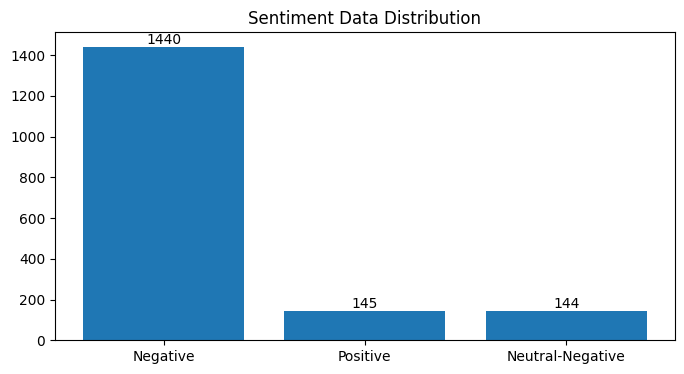

In [114]:
val_count = df_cleaned.sentiment.value_counts()

print(val_count)
plt.figure(figsize=(8,4))
bars = plt.bar(val_count.index, val_count.values)
plt.bar_label(bars)
plt.title("Sentiment Data Distribution")

trend

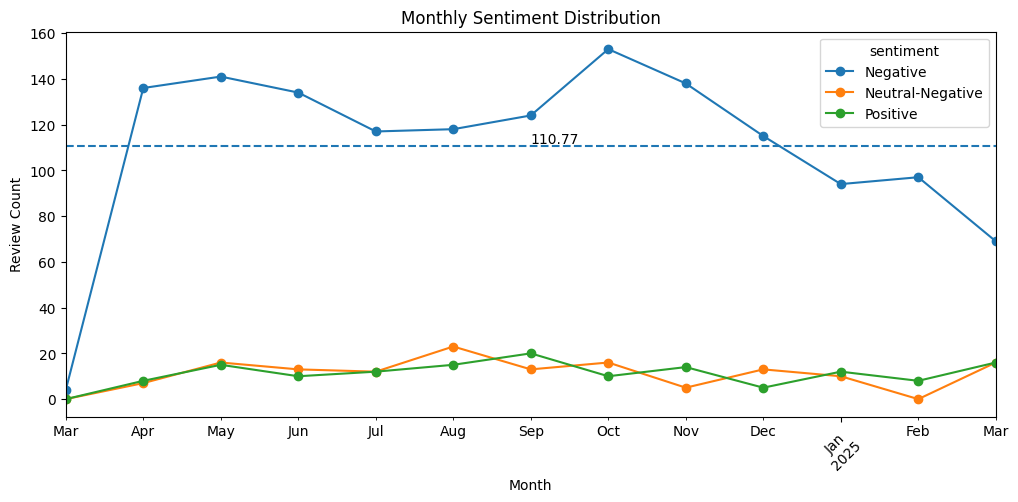

In [115]:
# Sentiment monthly distribution
sentiment_month = df_cleaned.groupby([df_cleaned['date'].dt.to_period('M'), df_cleaned['sentiment']]).size().unstack(fill_value=0)

# line chart
ax = sentiment_month.plot(kind='line', figsize=(12,5), marker='o')
# add mean line for 'negative'
neg_mean = sentiment_month['Negative'].mean()
ax.axhline(y=neg_mean, linestyle='--', label=f'Negative mean: {int(neg_mean)}')
ax.text(x=0.5, y=neg_mean + 1, s=f'{neg_mean:.2f}', fontsize=10, transform=ax.get_yaxis_transform())
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.show()

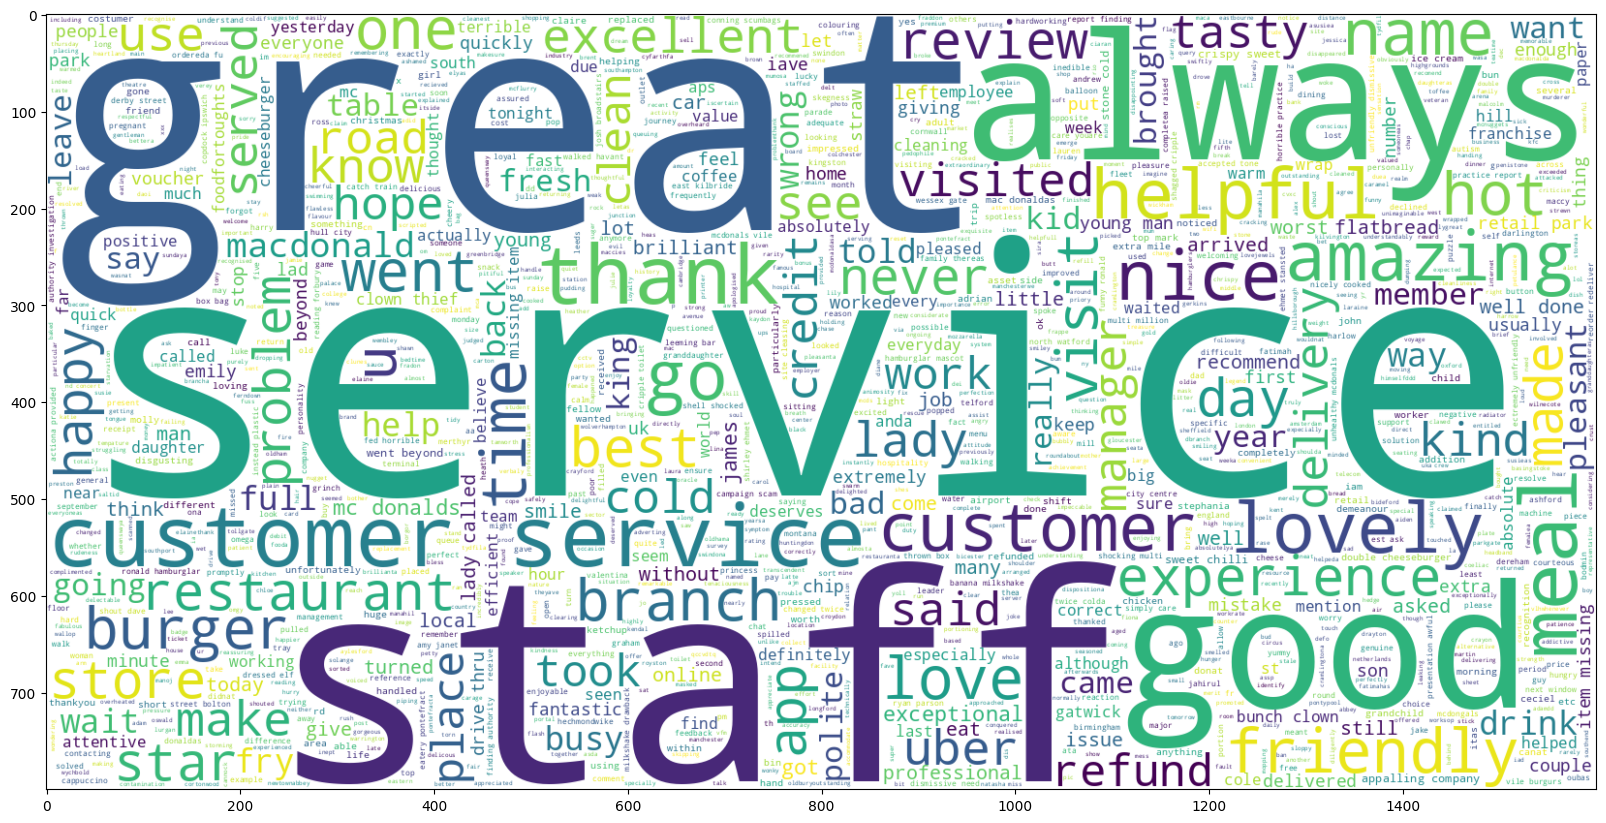

In [116]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_cleaned[df_cleaned.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

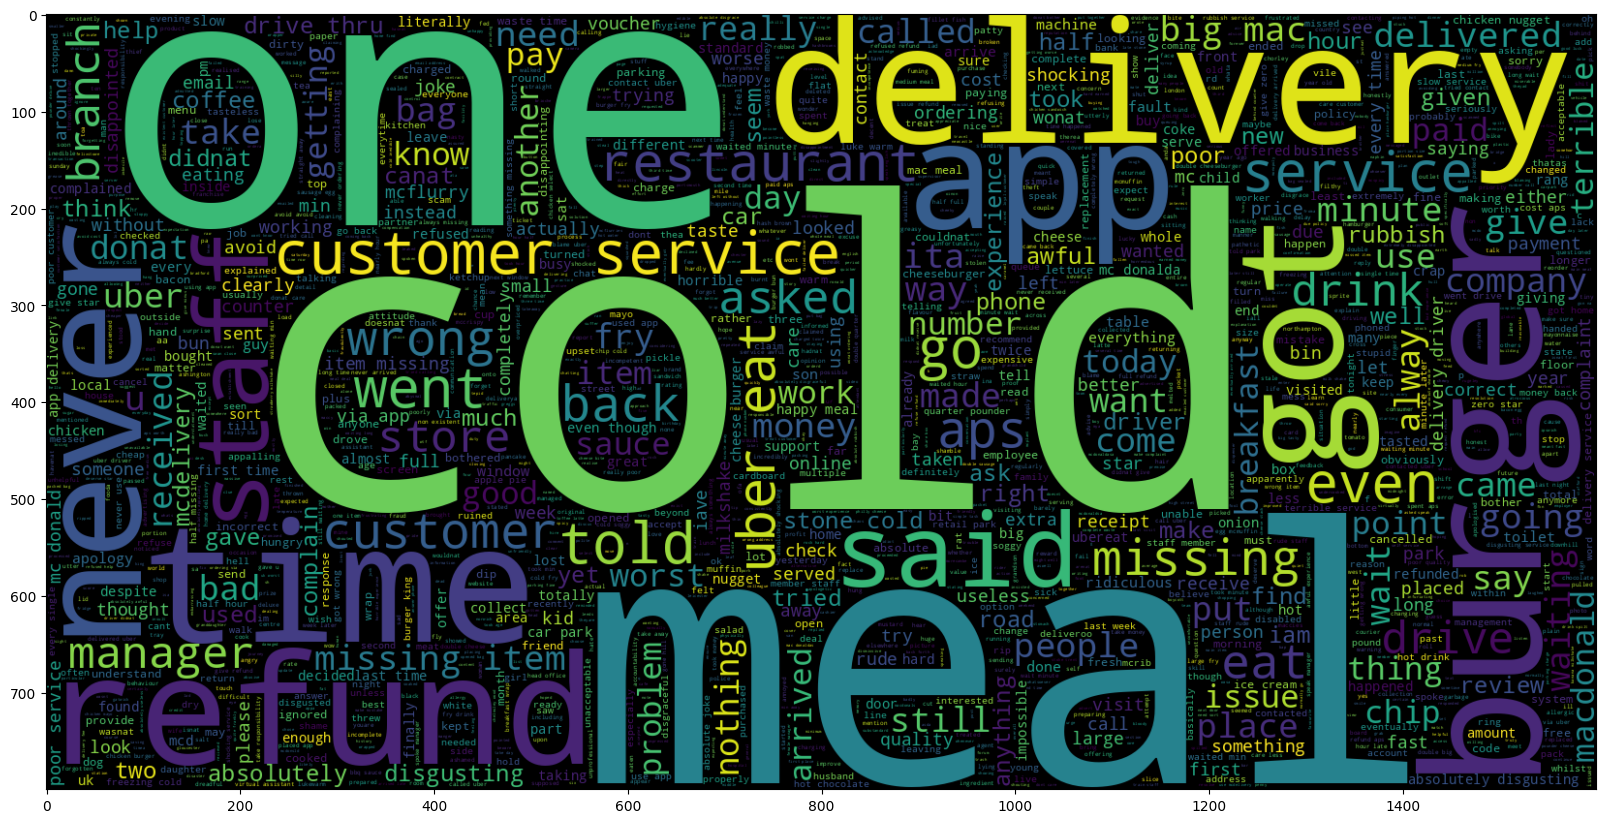

In [117]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_cleaned[df_cleaned.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

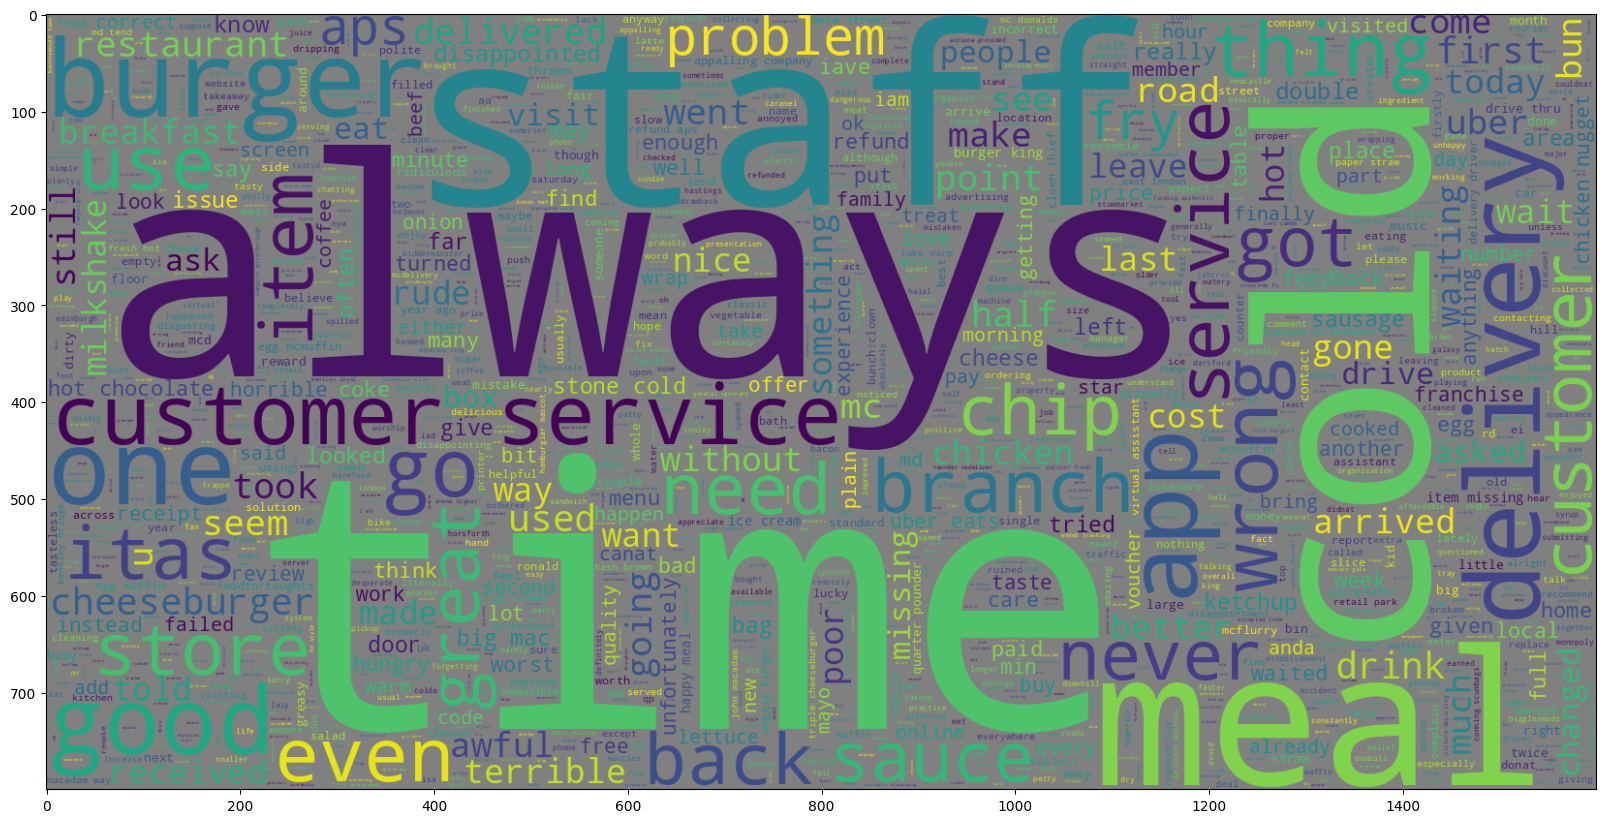

In [118]:
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'grey',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_cleaned[df_cleaned.sentiment == 'Neutral-Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# **4. LDA Analysis for negative and neutral negative**

In [119]:
!pip install -q pandas gensim pyLDAvis bertopic nltk gdown matplotlib seaborn

In [120]:
# Adapt with Genism
!pip install numpy==1.23.5
!pip install --upgrade --force-reinstall gensim

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but 

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [121]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import gensim
import gensim.corpora as corpora
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
#Load dataset
df_cleaned = pd.read_csv("mcdonalds_uk_cleaned.csv")

# Keep negative + neutral-negative
df_LDA = df_cleaned[df_cleaned['sentiment'].isin(['Negative', 'Neutral-Negative'])].copy()
df_LDA.dropna(subset=['text'], inplace=True)

df_LDA.count()

Unnamed: 0    1584
date          1584
star_group    1584
text          1584
sentiment     1584
dtype: int64

In [123]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenize text
df_LDA['tokens'] = df_LDA['text'].apply(lambda x: word_tokenize(str(x)))

# Create dictionary and corpus
tokenized_texts = df_LDA['tokens'].tolist()
dictionary_UK = corpora.Dictionary(tokenized_texts)
corpus_UK = [dictionary_UK.doc2bow(text) for text in tokenized_texts]

Topics: 2, Coherence Score: 0.4811
Topics: 3, Coherence Score: 0.4871
Topics: 4, Coherence Score: 0.4649
Topics: 5, Coherence Score: 0.4478
Topics: 6, Coherence Score: 0.4222
Topics: 7, Coherence Score: 0.4208
Topics: 8, Coherence Score: 0.4177
Topics: 9, Coherence Score: 0.3955
Topics: 10, Coherence Score: 0.4253
Topics: 11, Coherence Score: 0.4244
Topics: 12, Coherence Score: 0.4119
Topics: 13, Coherence Score: 0.4135
Topics: 14, Coherence Score: 0.4109
Topics: 15, Coherence Score: 0.3970
Topics: 16, Coherence Score: 0.3979
Topics: 17, Coherence Score: 0.3925
Topics: 18, Coherence Score: 0.3976
Topics: 19, Coherence Score: 0.3877
Topics: 20, Coherence Score: 0.4022
Topics: 21, Coherence Score: 0.3962


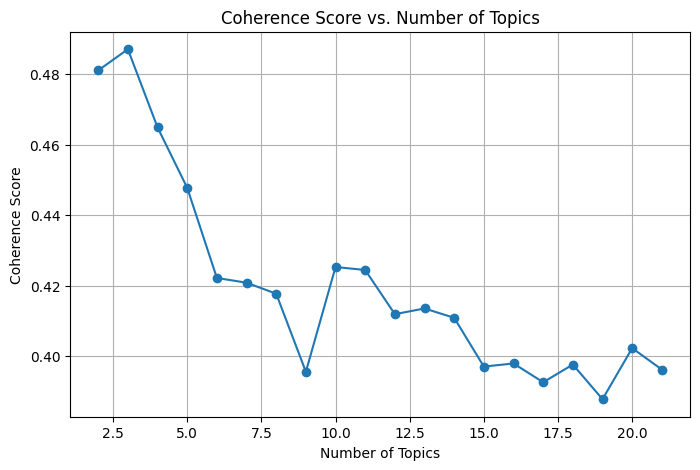

Optimal number of topics: 3


In [124]:
# Compute coherence scores across topic range, adjust parameters to find best one
def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    for num_topics in topic_range:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            iterations=300
        )
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence = coherence_model.get_coherence()
        coherence_scores.append(coherence)
        print(f"Topics: {num_topics}, Coherence Score: {coherence:.4f}")
    return coherence_scores

topic_range = range(2, 22)
coherence_scores = compute_coherence_values(dictionary_UK, corpus_UK, tokenized_texts, topic_range)

# Plot coherence scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

# Find the optimal topic number
optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_topic_num}")

In [125]:
# get the optimal visualise

import pyLDAvis
import pyLDAvis.gensim_models

lda_model_UK = gensim.models.LdaModel(
    corpus=corpus_UK,
    id2word=dictionary_UK,
    num_topics=optimal_topic_num,
    random_state=42,
    passes=10,
    iterations=400,
)
pyLDAvis.enable_notebook(local=True)

vis = pyLDAvis.gensim_models.prepare(lda_model_UK, corpus_UK, dictionary_UK, sort_topics=False)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.049491  0.043226       1        1  22.216297
1     -0.025922 -0.053280       2        1  59.954380
2      0.075413  0.010054       3        1  17.829323, topic_info=        Term        Freq       Total Category  logprob  loglift
12   missing  394.000000  394.000000  Default  30.0000  30.0000
0        app  393.000000  393.000000  Default  29.0000  29.0000
204    staff  320.000000  320.000000  Default  28.0000  28.0000
8       item  307.000000  307.000000  Default  27.0000  27.0000
263    drive  219.000000  219.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
177   minute   33.411530  225.012257   Topic3  -5.7592  -0.1829
324      got   33.963435  302.697594   Topic3  -5.7428  -0.4631
665      mac   27.515741  138.647323   Topic3  -5.9533   0.1072
0        app   30.907223  393.319908   Topic3  -5.8371  -0.8193
189     give   27.953698  180.276165   Topic3  -5.9375  -0.1396

[279 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2330      1  0.089003    agent
2330      2  0.890027    agent
413       1  0.132956  airport
413       3  0.797739  airport
815       1  0.935931    along
...     ...       ...      ...
262       2  0.598816    would
262       3  0.170593    would
92        1  0.100323    wrong
92        2  0.702262    wrong
92        3  0.200646    wrong

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [126]:
# Print LDA topics with keywords
print("\n=== Final LDA Topics ===")
for topic_id, words in lda_model_UK.show_topics(num_topics=optimal_topic_num, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")



=== Final LDA Topics ===
Topic 0: ['app', 'missing', 'time', 'item', 'get', 'service', 'customer', 'refund', 'meal', 'delivery']
Topic 1: ['cold', 'service', 'delivery', 'time', 'meal', 'burger', 'uber', 'customer', 'get', 'missing']
Topic 2: ['staff', 'customer', 'time', 'get', 'service', 'drive', 'one', 'went', 'restaurant', 'always']


**BERT**

In [127]:
# Train BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df_LDA['text'])

# Get BERTopic topics
bertopic_topics = topic_model.get_topics()
num_bertopic_topics = len(bertopic_topics)

# Output BERTopic results
print(f"\n=== BERTopic: {num_bertopic_topics} Topics Found ===")
for topic_id, words in bertopic_topics.items():
    print(f"Topic {topic_id}: {[word for word, _ in words[:10]]}")


=== BERTopic: 28 Topics Found ===
Topic -1: ['service', 'customer', 'time', 'cold', 'get', 'meal', 'delivery', 'missing', 'refund', 'burger']
Topic 0: ['rude', 'staff', 'manager', 'member', 'asked', 'customer', 'service', 'name', 'even', 'didnat']
Topic 1: ['app', 'use', 'money', 'delivery', 'useless', 'back', 'tried', 'time', 'doesnat', 'aps']
Topic 2: ['uber', 'eats', 'delivery', 'refund', 'deliver', 'said', 'get', 'delivered', 'driver', 'service']
Topic 3: ['minute', 'slow', 'waiting', 'wait', 'min', 'service', 'drive', 'waited', 'served', 'hour']
Topic 4: ['missing', 'item', 'uber', 'ashington', 'bag', 'time', 'branch', 'wakefield', 'ba', 'sealed']
Topic 5: ['toilet', 'floor', 'dirty', 'table', 'hand', 'staff', 'disgusting', 'hygiene', 'paper', 'clean']
Topic 6: ['mac', 'big', 'fry', 'meal', 'one', 'burger', 'instead', 'lettuce', 'bigmac', 'like']
Topic 7: ['cold', 'fry', 'cheeseburger', 'like', 'dirty', 'disgusting', 'thing', 'warm', 'yesterday', 'straw']
Topic 8: ['burger', 'fry

In [128]:
# Extract the top 10 keywords for each BERTopic topic
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_topics.values()]

# Filter out any empty topics to avoid errors
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

# Compute Coherence Score for BERTopic using the LDA dictionary
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_tokens, texts=df_LDA['tokens'], dictionary=dictionary_UK, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")

BERTopic Coherence Score: 0.476


Comparison:

In [129]:
# LDA diversity
def calculate_lda_topic_diversity(lda_model, top_n_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=top_n_words, formatted=False)
    unique_words = set()
    for topic in topics:
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (top_n_words * lda_model.num_topics)

lda_topic_diversity = calculate_lda_topic_diversity(lda_model_UK)

# BERTopic diversity
def calculate_topic_diversity(model, top_n_words=10):
    words = model.get_topics()
    unique_words = set()
    for topic in words.values():
        unique_words.update([word for word, _ in topic[:top_n_words]])
    return len(unique_words) / (top_n_words * len(words))

bertopic_topic_diversity = calculate_topic_diversity(topic_model)

print(f"LDA Topic Diversity Score: {lda_topic_diversity:.3f}")
print(f"BERTopic Topic Diversity Score: {bertopic_topic_diversity:.3f}")

LDA Topic Diversity Score: 0.633
BERTopic Topic Diversity Score: 0.743
